In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [ ]:
df.shape

(100, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

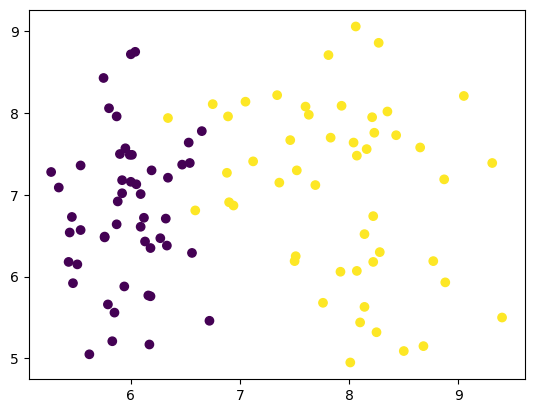

In [ ]:
#scatter(x,y)
plt.scatter(df['cgpa'],df['resume_score'], c=df['placed'])

In [ ]:
# : -> mujhe saare rows chayiye
# 0:2 -> 0 se 2 tak columns ke data chayiye
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [ ]:
X_test

,cgpa,resume_score
83,7.60,8.08
30,7.36,7.15
56,6.13,6.43
24,8.22,6.18
16,8.04,7.64
23,6.05,7.13
2,8.27,8.86
27,5.51,6.15
28,7.46,7.67
13,8.50,5.09


In [ ]:
from  sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.62545765,  1.20222559],
       [ 0.41074237,  0.23957102],
       [-0.68967342, -0.50570993],
       [ 1.18013878, -0.76448804],
       [ 1.01910232,  0.74677612],
       [-0.76124518,  0.21886877],
       [ 1.22487113,  2.00961329],
       [-1.24435455, -0.79554141],
       [ 0.50020707,  0.77782949],
       [ 1.43063994, -1.89276059]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test

,placed
83,1
30,1
56,0
24,1
16,1
23,0
2,1
27,0
28,1
13,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

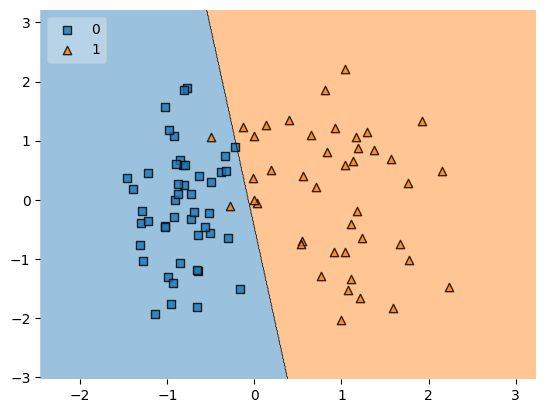

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
# it will convert object into file
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))